In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
df = pd.read_csv(r'D:\AKG\Dataset\boids\boids_python2\dataframe50.csv')
df

,Time,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49
0,0.0,2433.959333,2295.271787,1911.466420,2218.606541,2371.209331,2414.992688,1775.124512,1651.118124,1553.225253,...,2005.164134,1730.627323,1773.610424,2374.937241,2394.998281,2160.898451,1917.766332,2144.997320,2425.032897,1674.556940
1,1.0,2436.619569,2296.658562,1910.076864,2221.265325,2371.611297,2417.965636,1777.923735,1652.197175,1550.450505,...,2003.296774,1728.279352,1775.766207,2377.023529,2397.992069,2160.705494,1915.503860,2143.027239,2422.036411,1674.411784
2,2.0,2439.444319,2297.668900,1908.547040,2223.845953,2371.887595,2420.952886,1780.833696,1652.926644,1547.675758,...,2001.634679,1725.781865,1778.729669,2377.490323,2400.920355,2161.357522,1913.268694,2141.026231,2419.039740,1674.270491
3,3.0,2442.171719,2298.918416,1906.863527,2226.329052,2372.014863,2423.950185,1783.794535,1653.409793,1544.901011,...,2000.434411,1723.032437,1781.158543,2375.729480,2403.541913,2162.816094,1911.061174,2138.994765,2416.043067,1674.129248
4,4.0,2444.955961,2300.035555,1905.063551,2228.729070,2372.031485,2426.950139,1786.610800,1654.443550,1542.126263,...,1999.056551,1720.367572,1783.245457,2373.574302,2403.627776,2165.814865,1908.880288,2136.934731,2413.046394,1673.988005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595.0,1811.104778,3745.457281,1775.789797,2723.323702,1570.610968,3992.982754,2100.458334,2264.623271,8542.250596,...,1037.905006,840.630589,1665.483399,3583.151540,1461.001825,3032.126958,1944.522465,2507.062093,1807.723593,680.347634
596,596.0,1810.003789,3748.247948,1774.458102,2726.011933,1569.180909,3995.619974,2101.900819,2267.253716,8539.475848,...,1035.596710,842.546776,1664.161108,3585.844409,1463.912523,3031.400435,1946.392976,2509.407555,1806.407836,677.651566
597,597.0,1808.902801,3751.038616,1773.126407,2728.700165,1567.750849,3998.257194,2103.692607,2269.659853,8536.701101,...,1033.288414,844.462962,1662.838816,3588.537278,1466.823222,3030.673912,1948.263486,2511.753016,1805.092080,674.955497
598,598.0,1807.801812,3753.829283,1771.794712,2731.388396,1566.320790,4000.894414,2105.487970,2272.063324,8533.926354,...,1030.980119,846.379149,1661.516524,3591.230147,1469.733920,3029.947390,1950.133996,2514.098478,1803.776323,672.259429


In [26]:
df = pd.read_csv(r'D:\AKG\Dataset\boids\boids_main\dataframe.csv')

In [37]:
data = df.iloc[:, 1:2].values
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data_normalized = (data - mean) / std

In [38]:
X = data_normalized[:-1]
y = data_normalized[1:]

split_index = int(0.9 * len(X))  # 85% training, 15% validation
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

In [40]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((539, 1), (539, 1), (60, 1), (60, 1))

In [56]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))  # Input layer
# model.add(Dense(32, activation='relu'))  # Hidden layer 1
# model.add(Dense(128, activation='relu'))  # Hidden layer 2
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                64        
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


17/17 [==============================] - 0s 6ms/step - loss: 0.7397 - val_loss: 2.4814
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 2.2153
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4298 - val_loss: 2.2153
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3646 - val_loss: 2.2153
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3273 - val_loss: 2.2153
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3090 - val_loss: 2.2153
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.3000 - val_loss: 2.2153
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2959 - val_loss: 2.2153
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2934 - val_loss: 2.2153
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 0.2916 - val_loss: 2.2153
Epoch 11/50
17/17 [===========

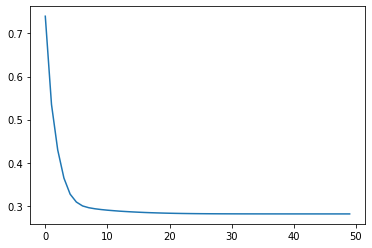

In [58]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [59]:
last_row_normalized = data_normalized[-2]
next_row_normalized = model.predict(np.expand_dims(last_row_normalized, axis=0))
next_row = next_row_normalized * std + mean

next_row

1/1 [==============================] - 0s 40ms/step


array([[2155.21537846]])

In [60]:
lr = last_row_normalized*std + mean

lr[0], lr[1], next_row[0][0], next_row[0][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

2/2 [==============================] - 0s 2ms/step


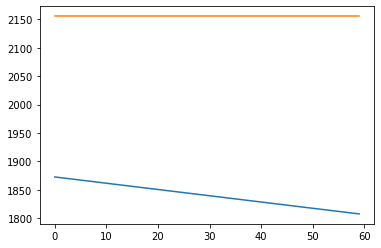

In [61]:
preds = model.predict(X_val)
plt.plot([i for i in range(0,60)], X_val*std + mean)
plt.plot([i for i in range(0,60)], preds*std + mean)